<a href="https://colab.research.google.com/github/Charan-1111/Medical-Insurance/blob/main/Medical_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **Loading Datasets**

In [523]:
df = pd.read_csv('insurance.csv')

In [524]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [525]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **EDA**

In [526]:
df.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns

In [527]:
columns = df.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [528]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [529]:
types = df.dtypes
types = dict(types)

types

{'age': dtype('int64'),
 'bmi': dtype('float64'),
 'charges': dtype('float64'),
 'children': dtype('int64'),
 'region': dtype('O'),
 'sex': dtype('O'),
 'smoker': dtype('O')}

The data has 4 Numerical Variables and 3 Categorical Variables

In [530]:
categorical_cols = []
for col in columns:
  if types[col] == 'object':
    categorical_cols.append(col)


print(categorical_cols)

['sex', 'smoker', 'region']


In [531]:
for col in categorical_cols:
  print(df.groupby(col).age.count())
  print("")

sex
female    662
male      676
Name: age, dtype: int64

smoker
no     1064
yes     274
Name: age, dtype: int64

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: age, dtype: int64



###### Observation
clearly we can conclude from the above


> 1) There are 2 categories in sex (male/female)


> 2) There are 2 categories in smoker (yes/no)


> 3) There are 4 categories in region (northeast, northwest, southeast, southwest)













In [532]:
# Checking for null valeus
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Observation

There are no null values present in the data

# **Feature Engineering and Data Visualiztion**

## Sex

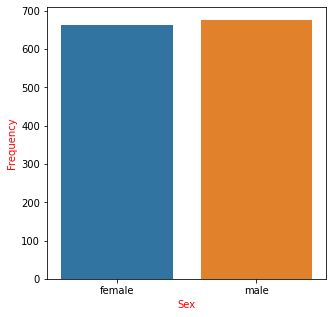

In [533]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="sex")
plt.xlabel("Sex",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")
#plt.title("Total Cars of all Companies",size=28,c="r")
plt.show()

## Smoker

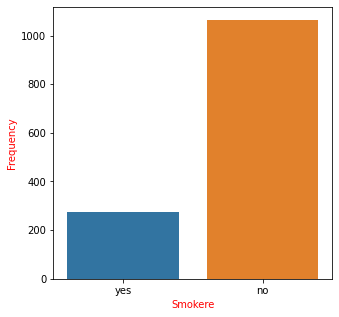

In [534]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="smoker")
plt.xlabel("Smokere",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")
#plt.title("Total Cars of all Companies",size=28,c="r")
plt.show()

## Region

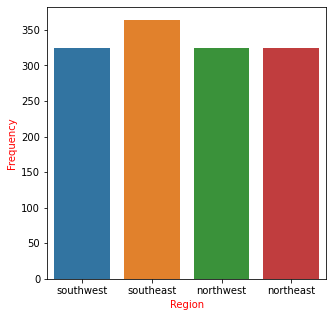

In [535]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="region")
plt.xlabel("Region",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")
#plt.title("Total Cars of all Companies",size=28,c="r")
plt.show()

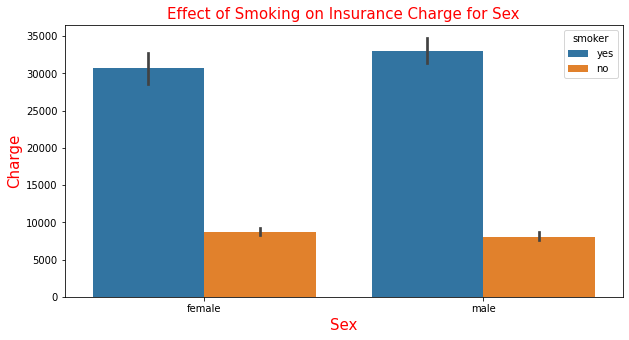

In [536]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,y="charges",x='sex',hue='smoker')
plt.xlabel("Sex",size=15,c="r")
plt.ylabel("Charge",size=15,c="r")
plt.title("Effect of Smoking on Insurance Charge for Sex",size=15,c="red")
plt.show()

##### Observation


1.   Charge for the smoker is more than charge for the non smoker irrespective of sex
2.   Charge for male smoker is more than Charge for Female smoker


3.   Charge for male non smoker is less than female non smoker









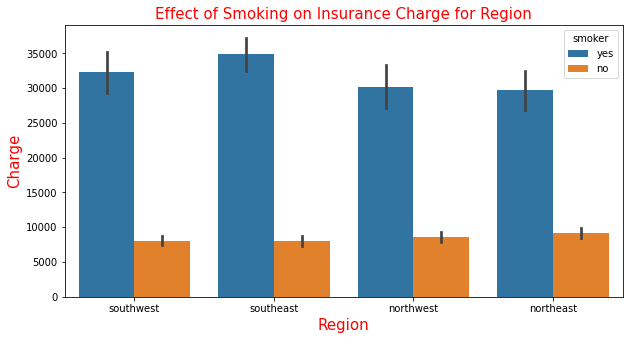

In [537]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,y="charges",x='region',hue='smoker')
plt.xlabel("Region",size=15,c="r")
plt.ylabel("Charge",size=15,c="r")
plt.title("Effect of Smoking on Insurance Charge for Region",size=15,c="red")
plt.show()

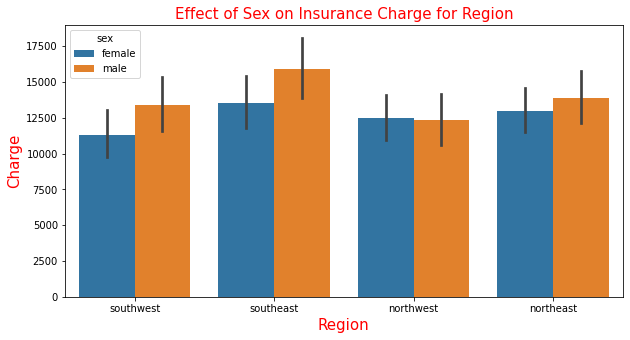

In [538]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,y="charges",x='region',hue='sex')
plt.xlabel("Region",size=15,c="r")
plt.ylabel("Charge",size=15,c="r")
plt.title("Effect of Sex on Insurance Charge for Region",size=15,c="red")
plt.show()

0 age
1 bmi
2 children
3 charges


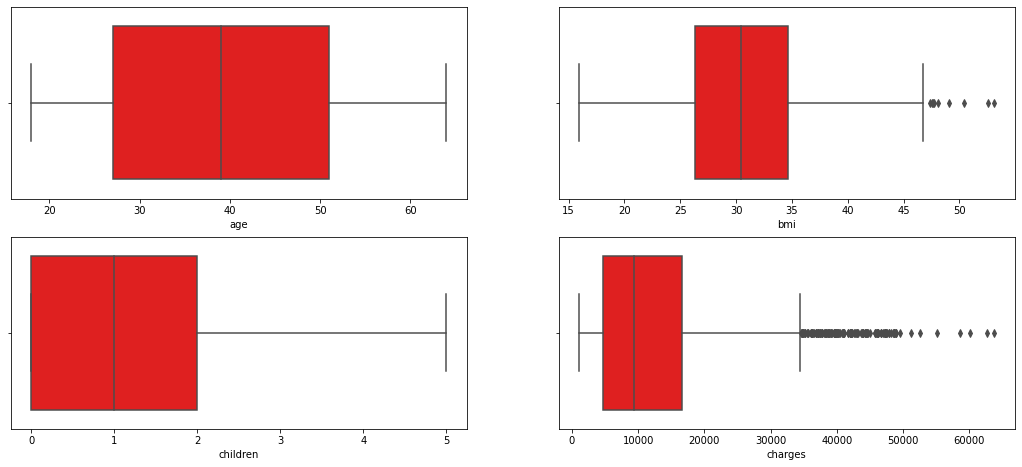

In [539]:
# Outlier Detection
ncol = ['age','bmi','children','charges'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(ncol):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df,color='red')
plt.show()

There are no outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


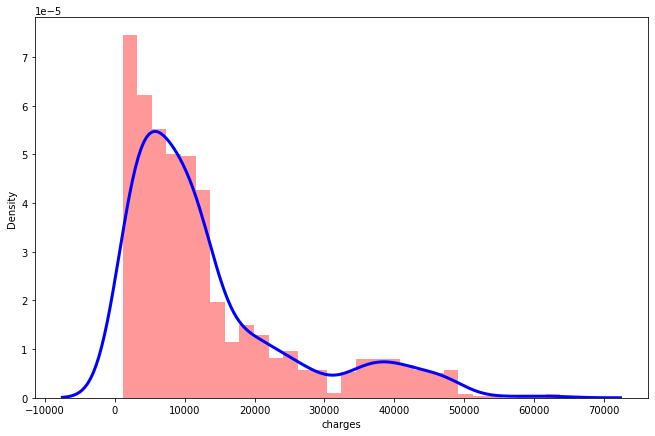

In [540]:
# Distribution of Output Charge feature

plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['charges'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

0 age
1 bmi
2 children
3 charges


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

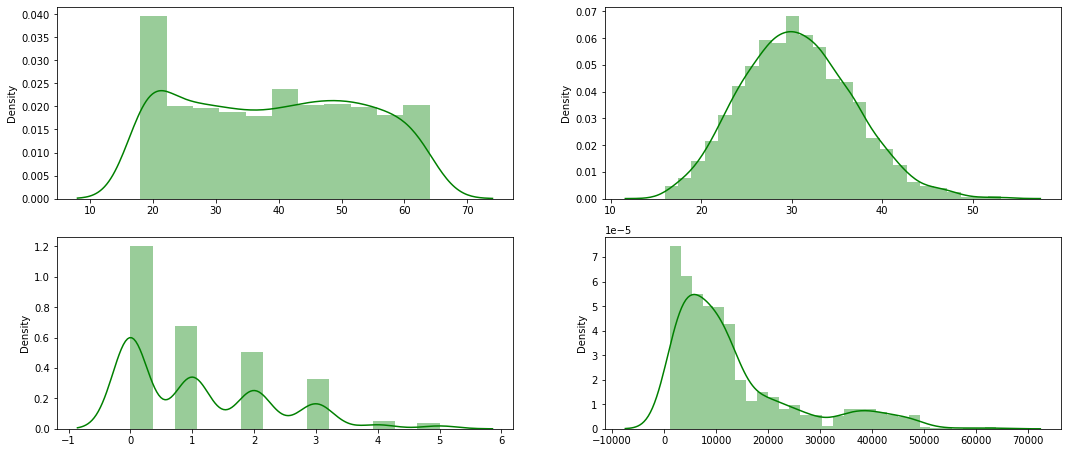

In [541]:
col = ['age','bmi','children',"charges"] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.distplot(x=df[v],color='g')
plt.show()

we can see that charges variables is more right skewed

In [542]:
# using log-transform

charge_log = np.log(df['charges'])
charge_log.skew()

-0.09009752473024582

In [543]:
df['charge_log'] = charge_log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


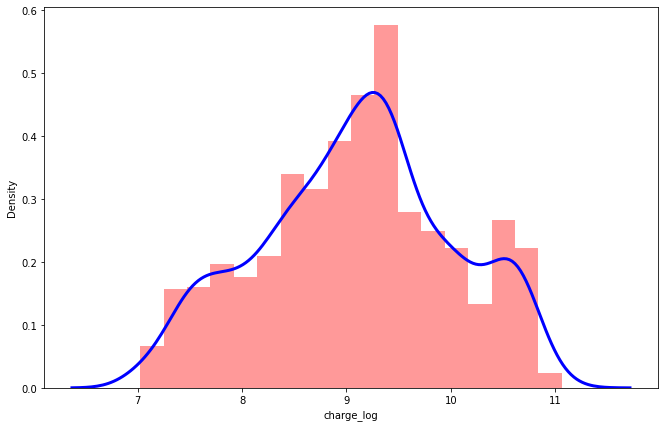

In [544]:
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['charge_log'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

In [545]:
#sqrt tranform
charge_sq = np.sqrt(df['charges'])
charge_sq.skew()

0.7958625166976426

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


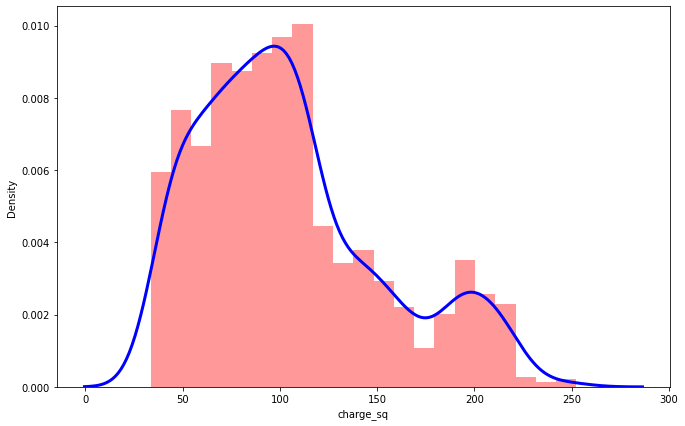

In [546]:
df['charge_sq'] = charge_sq
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['charge_sq'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

In [547]:
# box-cox transform

from scipy import stats
charge_box = stats.boxcox(df['charges'])[0]
pd.Series(charge_box).skew()
# c = stats.boxcox(df['charges'])
# print(c)

-0.008734097133920383

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


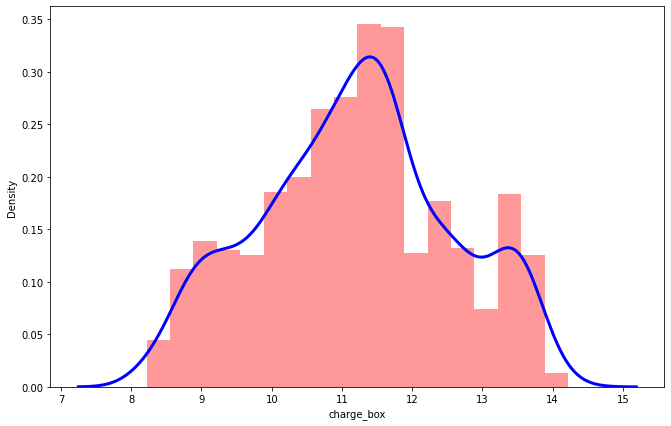

In [548]:
df['charge_box'] = charge_box
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['charge_box'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

from the above log-transformation and box-cox tranforamtion works well

In [549]:
df = df.drop(['charge_sq', 'charge_log'], axis=1)

In [550]:
df.drop(['charges'], axis=1, inplace=True)

In [551]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charge_box'], dtype='object')

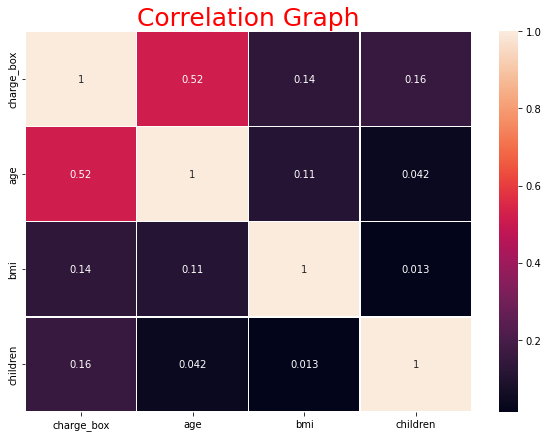

In [552]:
# Fing Correlation Matrix

plt.figure(figsize=(10,7))
sns.heatmap(df[["charge_box","age","bmi","children"]].corr(),annot=True, linewidths=.5)
plt.title("Correlation Graph",c="r",size=25)
plt.show()

#**Scaling and Categorical Encoding**

In [553]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_df = df.drop(['sex','smoker', 'region'], axis=1)
cols = numerical_df.columns
df_scaled = scaler.fit_transform(numerical_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=cols)

In [554]:
df = df.drop(cols, axis=1)
df

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [555]:
df = pd.concat([df, df_scaled], axis=1)
df

,sex,smoker,region,age,bmi,children,charge_box
0,female,yes,southwest,-1.438764,-0.453320,-0.908614,0.681644
1,male,no,southeast,-1.509965,0.509621,-0.078767,-1.748873
2,male,no,southeast,-0.797954,0.383307,1.580926,-0.768781
3,male,no,northwest,-0.441948,-1.305531,-0.908614,0.978814
4,male,no,northwest,-0.513149,-0.292556,-0.908614,-0.916560
...,...,...,...,...,...,...,...
1333,male,no,northwest,0.768473,0.050297,1.580926,0.165744
1334,female,no,northeast,-1.509965,0.206139,-0.908614,-1.498607
1335,female,no,southeast,-1.509965,1.014878,-0.908614,-1.806638
1336,female,no,southwest,-1.296362,-0.797813,-0.908614,-1.594762


In [556]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['n_sex']=le.fit_transform(df['sex'])

In [557]:
df.n_sex.nunique()

2

In [558]:
df['n_smoker'] = le.fit_transform(df['smoker'])
df['n_region'] = le.fit_transform(df['region'])

In [559]:
df.n_smoker.nunique()

2

In [560]:
df.n_region.nunique()

4

In [561]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

In [562]:
df

,age,bmi,children,charge_box,n_sex,n_smoker,n_region
0,-1.438764,-0.453320,-0.908614,0.681644,0,1,3
1,-1.509965,0.509621,-0.078767,-1.748873,1,0,2
2,-0.797954,0.383307,1.580926,-0.768781,1,0,2
3,-0.441948,-1.305531,-0.908614,0.978814,1,0,1
4,-0.513149,-0.292556,-0.908614,-0.916560,1,0,1
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.165744,1,0,1
1334,-1.509965,0.206139,-0.908614,-1.498607,0,0,0
1335,-1.509965,1.014878,-0.908614,-1.806638,0,0,2
1336,-1.296362,-0.797813,-0.908614,-1.594762,0,0,3


In [563]:
df_scaled

,age,bmi,children,charge_box
0,-1.438764,-0.453320,-0.908614,0.681644
1,-1.509965,0.509621,-0.078767,-1.748873
2,-0.797954,0.383307,1.580926,-0.768781
3,-0.441948,-1.305531,-0.908614,0.978814
4,-0.513149,-0.292556,-0.908614,-0.916560
...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.165744
1334,-1.509965,0.206139,-0.908614,-1.498607
1335,-1.509965,1.014878,-0.908614,-1.806638
1336,-1.296362,-0.797813,-0.908614,-1.594762


In [564]:
#making backup df
backup_df = df
df = df_scaled

# **Model Building**

In [565]:
X = df.drop('charge_box', axis=1)
y = df['charge_box']

In [566]:
X.columns

Index(['age', 'bmi', 'children'], dtype='object')

In [567]:
y

0       0.681644
1      -1.748873
2      -0.768781
3       0.978814
4      -0.916560
          ...   
1333    0.165744
1334   -1.498607
1335   -1.806638
1336   -1.594762
1337    1.299950
Name: charge_box, Length: 1338, dtype: float64

In [568]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### **Linear Regression**

In [569]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [570]:
#making prediction on train set and finding r2_score and mean square error
train_pred = lr_model.predict(X_train)
score = r2_score(y_train, train_pred)
error = mean_squared_error(y_train, train_pred)

print('============= ON TRAIN DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error)

============= ON TRAIN DATA SET =============
R2_Score:  0.3047545614643905
Error:  0.7178062023563491


In [571]:
#making prediction on test set and finding r2_score and mean square error

test_pred = lr_model.predict(X_test)
score = r2_score(y_test, test_pred)
error = mean_squared_error(y_test, test_pred)


print('============= ON TEST DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error)                    

============= ON TEST DATA SET =============
R2_Score:  0.25986178363469914
Error:  0.6842095993516761


### **Decision Tree Regressor**

In [572]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [573]:
#making prediction on train set and finding r2_score and mean square error
train_pred = dtr_model.predict(X_train)
score = r2_score(y_train, train_pred)
error = mean_squared_error(y_train, train_pred)

print('============= ON TRAIN DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error)

============= ON TRAIN DATA SET =============
R2_Score:  0.984423655628478
Error:  0.016081797851801753


In [574]:
#making prediction on test set and finding r2_score and mean square error

test_pred = dtr_model.predict(X_test)
score = r2_score(y_test, test_pred)
error = mean_squared_error(y_test, test_pred)


print('============= ON TEST DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error)         

============= ON TEST DATA SET =============
R2_Score:  -0.4923269131344845
Error:  1.3795590833719564


### **Random Forest Regressor**

In [575]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [576]:
#making prediction on train set and finding r2_score and mean square error
train_pred = rf_model.predict(X_train)
score = r2_score(y_train, train_pred)
error = mean_squared_error(y_train, train_pred)

print('============= ON TRAIN DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error)

============= ON TRAIN DATA SET =============
R2_Score:  0.8646668352939891
Error:  0.13972473550506068


In [577]:
#making prediction on test set and finding r2_score and mean square error

test_pred = rf_model.predict(X_test)
score = r2_score(y_test, test_pred)
error = mean_squared_error(y_test, test_pred)


print('============= ON TEST DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error) 

============= ON TEST DATA SET =============
R2_Score:  0.12624117164185145
Error:  0.8077331566755002


### **SVR**

In [578]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [579]:
#making prediction on train set and finding r2_score and mean square error
train_pred = svm_model.predict(X_train)
score = r2_score(y_train, train_pred)
error = mean_squared_error(y_train, train_pred)

print('============= ON TRAIN DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error)

============= ON TRAIN DATA SET =============
R2_Score:  0.15120493994221107
Error:  0.8763385199940505


In [580]:
#making prediction on test set and finding r2_score and mean square error

test_pred = svm_model.predict(X_test)
score = r2_score(y_test, test_pred)
error = mean_squared_error(y_test, test_pred)


print('============= ON TEST DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error) 

============= ON TEST DATA SET =============
R2_Score:  0.09158805053428776
Error:  0.8397677112830534


### **XGBoost Regressor**

In [581]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

[17:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [582]:
#making prediction on train set and finding r2_score and mean square error
train_pred = xgb_model.predict(X_train)
score = r2_score(y_train, train_pred)
error = mean_squared_error(y_train, train_pred)

print('============= ON TRAIN DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error)

============= ON TRAIN DATA SET =============
R2_Score:  0.4683401560044289
Error:  0.5489122436641249


In [583]:
#making prediction on test set and finding r2_score and mean square error

test_pred = xgb_model.predict(X_test)
score = r2_score(y_test, test_pred)
error = mean_squared_error(y_test, test_pred)


print('============= ON TEST DATA SET =============')
print('R2_Score: ', score)
print('Error: ', error) 

============= ON TEST DATA SET =============
R2_Score:  0.21844183749044632
Error:  0.7224996431974055


In [584]:
from xgboost import XGBRFRegressor
reg = XGBRFRegressor()
reg.fit(X_train, y_train)

[17:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()